In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [5]:
# d_PTVs = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

d_coding = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
))

# d_all = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))


2018-05-14 11:07:17,982 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz


In [6]:
labels_dict = {
    'Body mass index (BMI)': 'BMI',
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


2018-05-14 11:07:23,551 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8.pdf
2018-05-14 11:07:25,826 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8.png


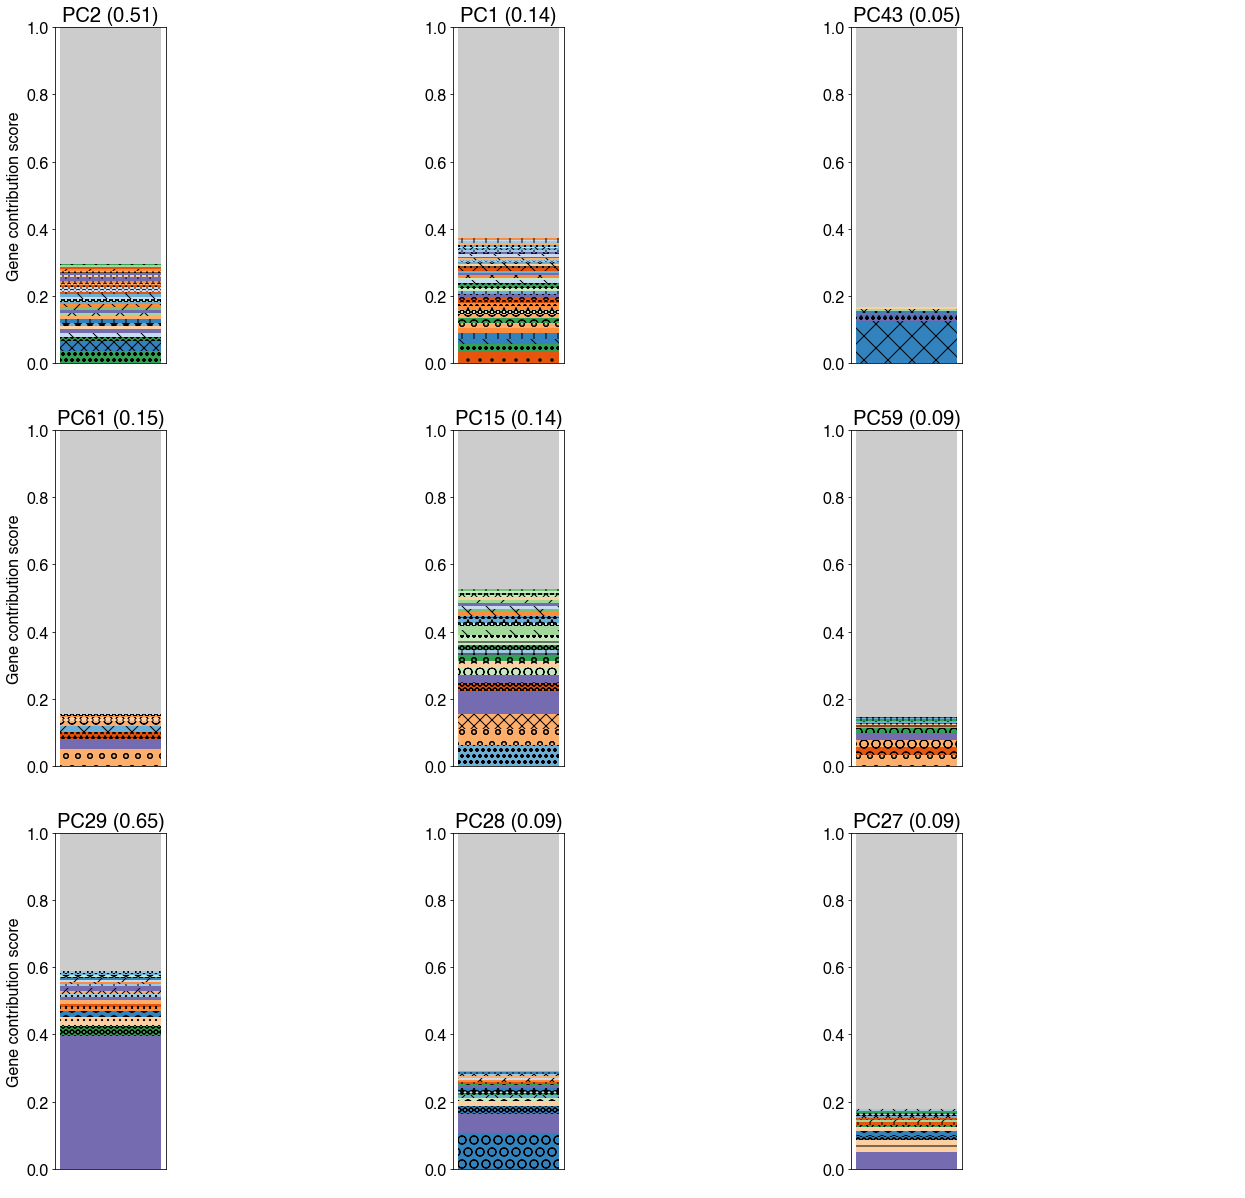

In [7]:
decomposition.plot_contribution_and_save(
    d = d_coding, 
    phe_or_gene = 'gene', 
    labels = labels_dict.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'figS8', 
    fig_spacing = 3, 
    contribution_thr=0.005, 
    pc_y_max = 1, 
    figsize=(21,21)
)

In [8]:
var_gene_labels_df = pd.read_table(
    os.path.join(repo_dir, 'private_data', 'variant_and_gene_labels.tsv.gz'),
    compression='gzip'
)

gene_dict = dict(zip(
    var_gene_labels_df['Gene'], 
    var_gene_labels_df['label_gene']
))

2018-05-14 11:07:37,117 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8_legend_BMI_1_PC2
2018-05-14 11:07:37,379 plot_contribution DEBUG    Others	others
2018-05-14 11:07:37,380 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8_legend_BMI_1_PC2.png
2018-05-14 11:07:37,780 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8_legend_BMI_1_PC2.pdf
2018-05-14 11:07:38,029 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8_legend_BMI_2_PC1
2018-05-14 11:07:38,136 plot_contribution DEBUG    Others	others
2018-05-14 11:07:38,138 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8_legend_BMI_2_PC1.png
2018-05-14 11:07:38,449 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/f

querying 1-2...done.


2018-05-14 11:07:43,763 plot_contribution DEBUG    MC1R	ENSG00000198211,ENSG00000258839
2018-05-14 11:07:43,766 plot_contribution DEBUG    AC008695.1,RAPGEF6	ENSG00000273217,ENSG00000158987
2018-05-14 11:07:43,768 plot_contribution DEBUG    Others	others
2018-05-14 11:07:43,771 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8_legend_Gallstones_3_PC27.png


Finished.


2018-05-14 11:07:44,053 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS8_CodingGene/figS8_legend_Gallstones_3_PC27.pdf


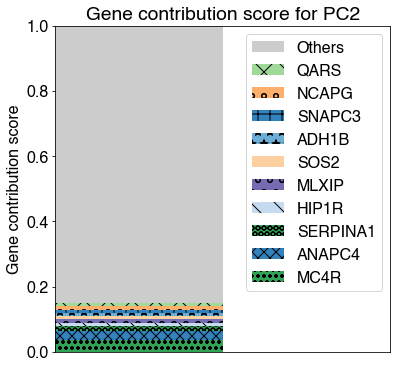

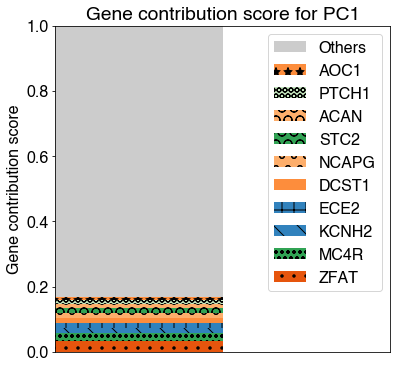

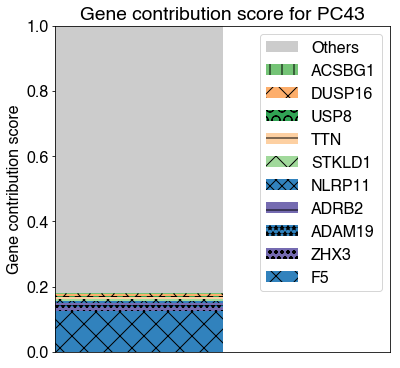

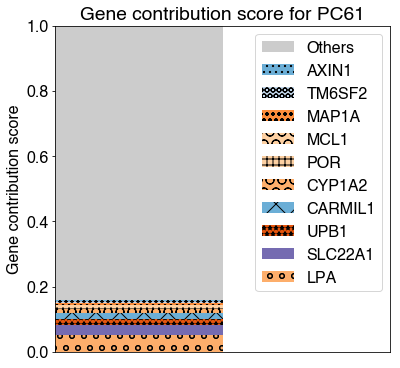

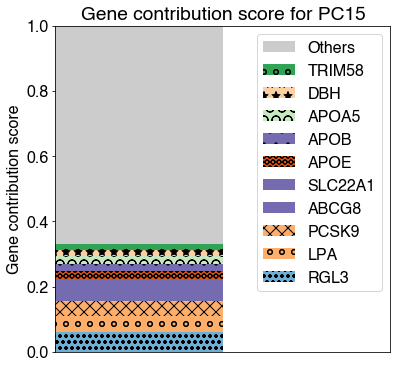

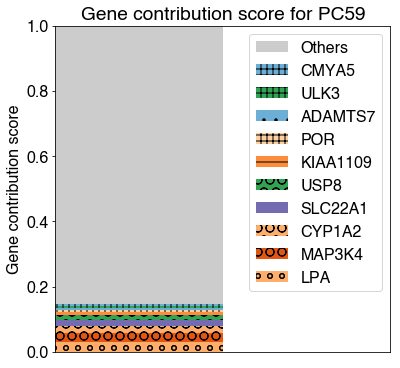

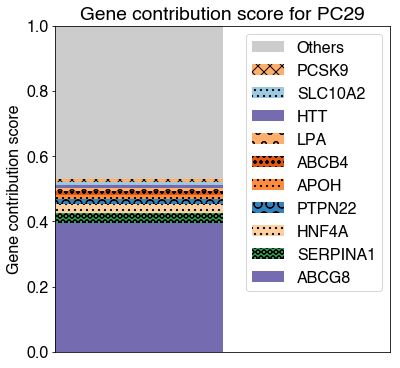

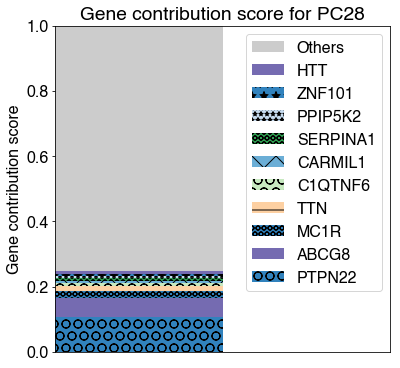

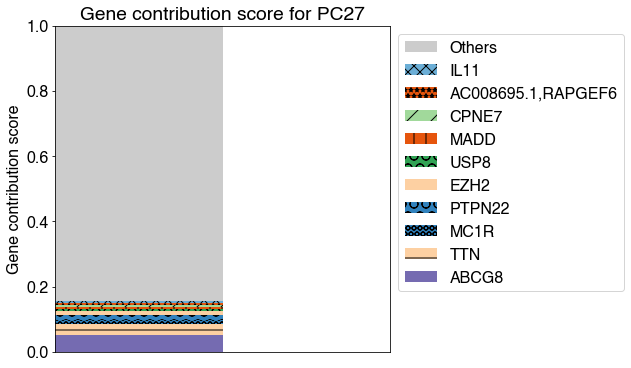

In [9]:
decomposition.plot_contribution_legend_gene_batch_fig(
    labels_dict, 
    gene_dict,
    out_dir, 
    fig_title = 'figS8', 
    d = d_coding, 
    topk = 3, 
)